<a href="https://colab.research.google.com/github/AyeshaAnzerBCIT/3DPoseASDDetection/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!apt-get install -y google-cloud-sdk


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package google-cloud-sdk


In [8]:
!pip install google-auth

In [20]:
from google.colab import auth
auth.authenticate_user()

# Authenticate GCS and log in
!gcloud auth application-default login


/usr/local/lib/python3.11/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)



You are running on a Google Compute Engine virtual machine.
The service credentials associated with this virtual machine
will automatically be used by Application Default
Credentials, so it is not necessary to use this command.

If you decide to proceed anyway, your user credentials may be visible
to others with access to this virtual machine. Are you sure you want
to authenticate with your personal account?

Do you want to continue (Y/n)?  Y

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=Pj07AI9k0KcZYwhvUdZv34ivdm6wWM&prompt=consent&token_

In [27]:
!gcloud storage buckets list


---
creation_time: 2025-03-11T00:59:43+0000
default_storage_class: STANDARD
generation: 1741654783215219025
location: US
location_type: multi-region
metageneration: 2
name: eegchild
public_access_prevention: enforced
rpo: DEFAULT
soft_delete_policy:
  effectiveTime: '2025-03-11T00:59:43.611000+00:00'
  retentionDurationSeconds: '604800'
storage_url: gs://eegchild/
uniform_bucket_level_access: true
update_time: 2025-03-11T01:02:03+0000
---
creation_time: 2025-03-11T00:58:46+0000
default_storage_class: STANDARD
generation: 1741654725694319264
lifecycle_config:
  rule:
  - action:
      type: Delete
    condition:
      isLive: false
      numNewerVersions: 1
  - action:
      type: Delete
    condition:
      daysSinceNoncurrentTime: 1
location: US
location_type: multi-region
metageneration: 2
name: mmasd
public_access_prevention: enforced
rpo: DEFAULT
soft_delete_policy:
  effectiveTime: '2025-03-11T00:58:46.018000+00:00'
  retentionDurationSeconds: '5356800'
storage_url: gs://mmasd/
un

In [32]:
!gcloud services enable storage.googleapis.com --project=still-chassis-227311


Operation "operations/acat.p2-255698801066-d47614b0-00ec-4130-be3e-d637f7d248f7" finished successfully.


In [33]:
!gcloud projects get-iam-policy still-chassis-227311

bindings:
- members:
  - serviceAccount:service-255698801066@compute-system.iam.gserviceaccount.com
  role: roles/compute.serviceAgent
- members:
  - serviceAccount:255698801066@cloudservices.gserviceaccount.com
  - serviceAccount:255698801066-compute@developer.gserviceaccount.com
  role: roles/editor
- members:
  - user:ayesha.anzer@gmail.com
  role: roles/owner
etag: BwV-Y9tb5WY=
version: 1


In [35]:
!gcloud projects add-iam-policy-binding still-chassis-227311 \
    --member="user:ayesha.anzer@gmail.com" \
    --role="roles/storage.admin"


Updated IAM policy for project [still-chassis-227311].
bindings:
- members:
  - serviceAccount:service-255698801066@compute-system.iam.gserviceaccount.com
  role: roles/compute.serviceAgent
- members:
  - serviceAccount:255698801066-compute@developer.gserviceaccount.com
  - serviceAccount:255698801066@cloudservices.gserviceaccount.com
  role: roles/editor
- members:
  - user:ayesha.anzer@gmail.com
  role: roles/owner
- members:
  - user:ayesha.anzer@gmail.com
  role: roles/storage.admin
etag: BwYwFGz9TCk=
version: 1


In [29]:
!gcloud storage ls gs://mmasd/**.csv


gs://mmasd/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_000_i_4_0.csv
gs://mmasd/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_000_i_5_1.csv
gs://mmasd/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_000_i_7_0.csv
gs://mmasd/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_001_n_4_1.csv
gs://mmasd/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_001_n_9_0.csv
gs://mmasd/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_002_n_3_0.csv
gs://mmasd/3_75 ELEMENTS LABLES_ME

In [39]:
from google.colab import auth
auth.authenticate_user()

/usr/local/lib/python3.11/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [40]:
# Define GCS bucket name and dataset folder path
BUCKET_NAME = "mmasd"
# Initialize Google Cloud Storage client
client = storage.Client()
bucket = client.bucket(BUCKET_NAME)

#   List All Files to Verify Folder Structure
all_files = [blob.name for blob in bucket.list_blobs()]  # List everything in the bucket

# Debugging: Print the first 10 file paths to verify structure
print(f"Total files found in GCS: {len(all_files)}")
print("Sample file paths in GCS:")
for file in all_files[:10]:  # Show first 10 files
    print(file)

/usr/local/lib/python3.11/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/usr/local/lib/python3.11/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Total files found in GCS: 3276
Sample file paths in GCS:
3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_000_i_4_0.csv
3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_000_i_5_1.csv
3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_000_i_7_0.csv
3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_001_n_4_1.csv
3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_001_n_9_0.csv
3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_002_n_3_0.csv
3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Sub

In [41]:
# Filter CSV files from all_files
csv_files = [file for file in all_files if file.endswith(".csv")]

print(f"Total CSV files found: {len(csv_files)}")
print("Sample CSV file paths:")
for file in csv_files[:5]:  # Show first 5 CSV files
    print(file)


Total CSV files found: 3276
Sample CSV file paths:
3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_000_i_4_0.csv
3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_000_i_5_1.csv
3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_000_i_7_0.csv
3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_001_n_4_1.csv
3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/3_75 ELEMENTS LABLES_MEDIAPIPE_Final_to_Submit/Arm_Swing/processed_Arm_swingas_20583_D16_001_n_9_0.csv


In [52]:
import pandas as pd
import torch
from torch.utils.data import Dataset
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report


In [43]:
class CustomDataset(Dataset):
    def __init__(self, file_list, bucket):
        self.file_list = file_list
        self.bucket = bucket  # GCS bucket instance

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        file_path = self.file_list[idx]
        blob = self.bucket.blob(file_path)

        # Download the CSV file as text
        content = blob.download_as_text()

        #  Load CSV content into Pandas
        data = pd.read_csv(StringIO(content)).dropna().reset_index(drop=True)

        if 'Unnamed: 0' in data.columns:
            data = data.drop('Unnamed: 0', axis=1)

        #  Ensure each sample has at least 180 rows (for LSTM)
        if len(data) < 180:
            repeat_times = (180 // len(data)) + 1
            data = pd.concat([data] * repeat_times, ignore_index=True)

        data = data[:179]  # Trim to exactly 179 rows

        # Normalize Features
        features = data.drop(['ASD_Label', 'Action_Label'], axis=1)
        features_norm = (features - features.min()) / (features.max() - features.min())
        features_tensor = torch.tensor(features_norm.values, dtype=torch.float)

        # Extract Labels
        asd_label = 1 if int(data['ASD_Label'].iloc[0]) >= 1 else 0
        action_label = int(data['Action_Label'].iloc[0])

        return features_tensor, torch.tensor(asd_label, dtype=torch.long), torch.tensor(action_label, dtype=torch.long)


In [45]:


# Create dataset
dataset = CustomDataset(csv_files, bucket)

# Split dataset (80% Train, 10% Validation, 10% Test)
train_size = int(0.8 * len(dataset))
val_size = (len(dataset) - train_size) // 2
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

#  Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Dataset split: Train ({len(train_dataset)}), Validation ({len(val_dataset)}), Test ({len(test_dataset)})")


Dataset split: Train (2620), Validation (328), Test (328)


In [46]:


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


In [48]:
#  Training Setup
input_size = 75  # Number of features
hidden_size = 64
num_layers = 4
num_classes = 11

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel(input_size, hidden_size, num_layers, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(f"Using device: {device}")

#  Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for features, asd_labels, action_labels in train_loader:
        features, action_labels = features.to(device), action_labels.to(device)

        outputs = model(features)
        loss = criterion(outputs, action_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * features.size(0)

    train_loss = running_loss / len(train_loader.dataset)

    #  Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, asd_labels, action_labels in val_loader:
            features, action_labels = features.to(device), action_labels.to(device)
            outputs = model(features)
            loss = criterion(outputs, action_labels)
            val_loss += loss.item() * features.size(0)

            _, predicted = torch.max(outputs, 1)
            total += action_labels.size(0)
            correct += (predicted == action_labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss / len(val_loader.dataset):.4f}, Val Accuracy: {val_accuracy:.2f}%")

    if epoch % 10 == 0 or epoch == num_epochs - 1:
        torch.save(model.state_dict(), f"lstm_model_epoch_{epoch}.pth")

print("Training complete!")


Using device: cuda
Epoch [1/100], Train Loss: 2.3856, Val Loss: 2.3717, Val Accuracy: 8.23%
Epoch [2/100], Train Loss: 2.3604, Val Loss: 2.3386, Val Accuracy: 13.72%
Epoch [3/100], Train Loss: 2.3268, Val Loss: 2.2780, Val Accuracy: 21.04%
Epoch [4/100], Train Loss: 2.3128, Val Loss: 2.2721, Val Accuracy: 21.04%
Epoch [5/100], Train Loss: 2.3450, Val Loss: 2.2910, Val Accuracy: 17.99%
Epoch [6/100], Train Loss: 2.3093, Val Loss: 2.2809, Val Accuracy: 17.68%
Epoch [7/100], Train Loss: 2.2910, Val Loss: 2.3587, Val Accuracy: 15.85%
Epoch [8/100], Train Loss: 2.3062, Val Loss: 2.2471, Val Accuracy: 18.60%
Epoch [9/100], Train Loss: 2.2909, Val Loss: 2.2658, Val Accuracy: 17.38%
Epoch [10/100], Train Loss: 2.3051, Val Loss: 2.2530, Val Accuracy: 19.51%
Epoch [11/100], Train Loss: 2.2758, Val Loss: 2.2467, Val Accuracy: 17.99%
Epoch [12/100], Train Loss: 2.2547, Val Loss: 2.2392, Val Accuracy: 19.21%
Epoch [13/100], Train Loss: 2.2605, Val Loss: 2.1835, Val Accuracy: 23.78%
Epoch [14/100], 

In [50]:
model.eval()

all_labels = []
all_predictions = []

with torch.no_grad():
    for features, asd_labels, action_labels in test_loader:
        features, action_labels = features.to(device), action_labels.to(device)
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(action_labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

report = classification_report(
    all_labels,
    all_predictions,
    target_names=[
        'Arm_Swing', 'Body_Pose', 'Drumming', 'Frog_Pose', 'Marcas_Forward',
        'Marcas_Shaking', 'Sing_Clap', 'Squat_Pose', 'Tree_Pose', 'Twist_Pose', 'chest_expansion'
    ]
)
print(report)


                 precision    recall  f1-score   support

      Arm_Swing       1.00      0.03      0.06        30
      Body_Pose       0.43      0.33      0.38        27
       Drumming       0.33      0.29      0.31        24
      Frog_Pose       0.00      0.00      0.00        38
 Marcas_Forward       0.22      0.60      0.32        40
 Marcas_Shaking       0.32      0.47      0.38        30
      Sing_Clap       0.14      0.10      0.12        39
     Squat_Pose       0.00      0.00      0.00        31
      Tree_Pose       0.88      0.61      0.72        23
     Twist_Pose       0.16      0.19      0.17        26
chest_expansion       0.19      0.50      0.27        20

       accuracy                           0.27       328
      macro avg       0.33      0.28      0.25       328
   weighted avg       0.31      0.27      0.23       328



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


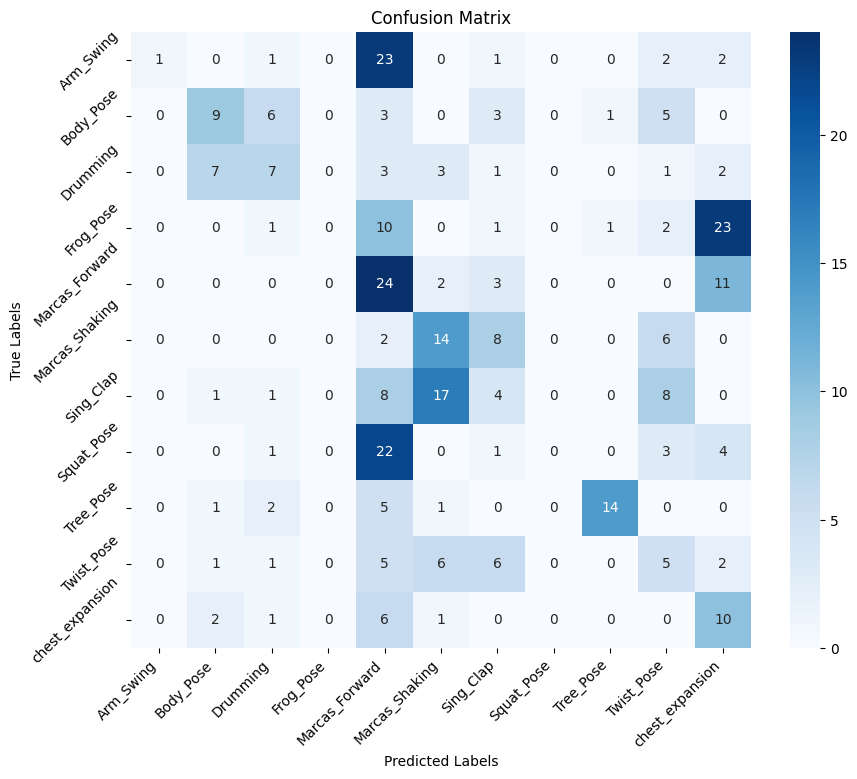

In [53]:


# Generate confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
class_names = [
    'Arm_Swing', 'Body_Pose', 'Drumming', 'Frog_Pose', 'Marcas_Forward',
    'Marcas_Shaking', 'Sing_Clap', 'Squat_Pose', 'Tree_Pose', 'Twist_Pose', 'chest_expansion'
]

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.show()
